# imports

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import matplotlib.pyplot as plt

# Device

In [2]:
device = 'GPU' if torch.cuda.is_available() else 'cpu'
device

'cpu'

# parameters

In [3]:
input_size = 784
hidden_layers = 100
learning_rate = 0.001
num_epoch = 2
num_classes = 10 
batch_size = 100

# Datas

In [4]:
train_data = torchvision.datasets.MNIST(root='./dataMNIST', train=True, transform=transforms.ToTensor(),download=True)
test_data = torchvision.datasets.MNIST(root='./dataMNIST', train=False, transform=transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_data, batch_size=batch_size, shuffle=True)


In [5]:
print(len(train_data))
print(len(test_data))

print(len(train_loader))
print(len(test_loader))

60000
10000
600
100


# Batch

In [6]:
batch = next(iter(train_loader))
images, labels = batch
images.shape, labels.shape

(torch.Size([100, 1, 28, 28]), torch.Size([100]))

In [7]:
len(images[0][0]) # meaning we've 28 tensors i think each tensor represents a horizontal line

28

In [8]:
# images[0][0]

# Visualization

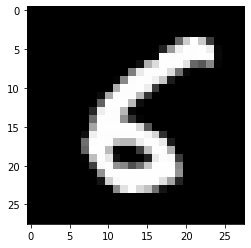

In [9]:
plt.imshow(images[0][0], cmap='gray')
plt.show()

# Build Module

In [10]:
class LinearNeuralNetwork(nn.Module):
    
    def __init__(self, input_size, hidden_layers, num_classes):
        super(LinearNeuralNetwork, self).__init__()
        
        self.lin_1 = nn.Linear(in_features=input_size, out_features=hidden_layers)
        self.relu = nn.ReLU()
        self.lin_2 = nn.Linear(in_features=hidden_layers, out_features=num_classes)
        
        
    def forward(self, x):
        out = self.lin_1(x)
        out = self.relu(out)
        out = self.lin_2(out)
        return out
    

model = LinearNeuralNetwork(input_size, hidden_layers, num_classes)
model

LinearNeuralNetwork(
  (lin_1): Linear(in_features=784, out_features=100, bias=True)
  (relu): ReLU()
  (lin_2): Linear(in_features=100, out_features=10, bias=True)
)

# Loss & Optim

In [11]:
critrsion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)


# Trianing loop

In [12]:
import time

for epoch in range(2):
    
    ix = 0
    corr_pred = 0
    n_samples = 0 
    
    for images, labels in train_loader: # will loop 600 times. cuz 600 * 100 = 60,000
        images = images.reshape(-1, 28*28).to(device=device)
        labels = labels.to(device=device)

        scores = model(images) # we've 100 predictions ten for each digits

        loss = critrsion(scores, labels)
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()
        
        _, predictions = torch.max(scores, 1)
        good_pred = (predictions == labels)
                
        corr_pred += good_pred.sum().item()
        n_samples += labels.shape[0]
        
        ix += 1
        
        if ix % 100 == 0:
            print (f'Loss: {loss.item():.4f}')
            
    print(f" >>> num_correct_Train_pred : {corr_pred}")
    print(f" >>> Accuracy_Train in % : {corr_pred / (n_samples) * 100} ")

Loss: 0.4560
Loss: 0.2390
Loss: 0.3163
Loss: 0.3273
Loss: 0.1519
Loss: 0.3106
 >>> num_correct_Train_pred : 53509
 >>> Accuracy_Train in % : 89.18166666666667 
Loss: 0.2173
Loss: 0.1188
Loss: 0.1264
Loss: 0.2351
Loss: 0.1030
Loss: 0.1195
 >>> num_correct_Train_pred : 56720
 >>> Accuracy_Train in % : 94.53333333333333 


# Test Loop

In [13]:
# here we do not need to calculate the grad, cuz we do not want our model to see our new data.
with torch.no_grad():
    ix = 0
    corr_test_pred = 0
    n_test_samples = 0
    
    for images, labels in test_loader:
        
        images = images.reshape(-1, 28*28).to(device=device)
        labels = labels.to(device=device)
        
        test_scores = model(images)
        _, predictions = torch.max(test_scores, 1)
        corr_test_pred += (predictions == labels).sum().item()
        n_test_samples += labels.shape[0]    
        
    if ix % 100 == 0:
        print(f" >>> test_correct_pred : {corr_test_pred}")
        print(f" >>> Accuracy_Train in % : {corr_test_pred / (n_test_samples) * 100} ")
        

 >>> test_correct_pred : 9558
 >>> Accuracy_Train in % : 95.58 
